In [1]:
library(ggplot2)
library(dplyr)
library(cowplot)
library(scales)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df <- read.table("IBIS-Metadata-Genomic.txt", sep="\t", header = F, stringsAsFactors = F, col.names = c("tf", "assay", "phase", "n", "nPeaks"))
df %>% head()

,tf,assay,phase,n,nPeaks
,<chr>,<chr>,<chr>,<int>,<int>
1,GABPA,CHS,L,1,2287
2,PRDM5,CHS,L,2,51671
3,SP140,CHS,L,1,806
4,ZNF362,CHS,L,3,116599
5,ZNF407,CHS,L,1,1126
6,CAMTA1,CHS,F,1,1114


In [3]:
df <- df %>% mutate(label = paste0(n, "\n(", nPeaks, ")"))

In [4]:
options(repr.plot.width=22, repr.plot.height=12)
p <- ggplot(df, aes(tf, assay, fill=phase, label=label)) + 
    geom_tile(color="black", size=1) +
    geom_text(size=4) + 
    scale_fill_manual("Phase", 
                      values = c("L" = "#7fc97f", "F" = "#beaed4", "absent" = "black")) +  
    scale_y_discrete("Assay") + 
    scale_x_discrete("TF") + 
    coord_fixed() + 
    theme_cowplot() + 
    theme(axis.line = element_blank(), 
          axis.ticks = element_blank())

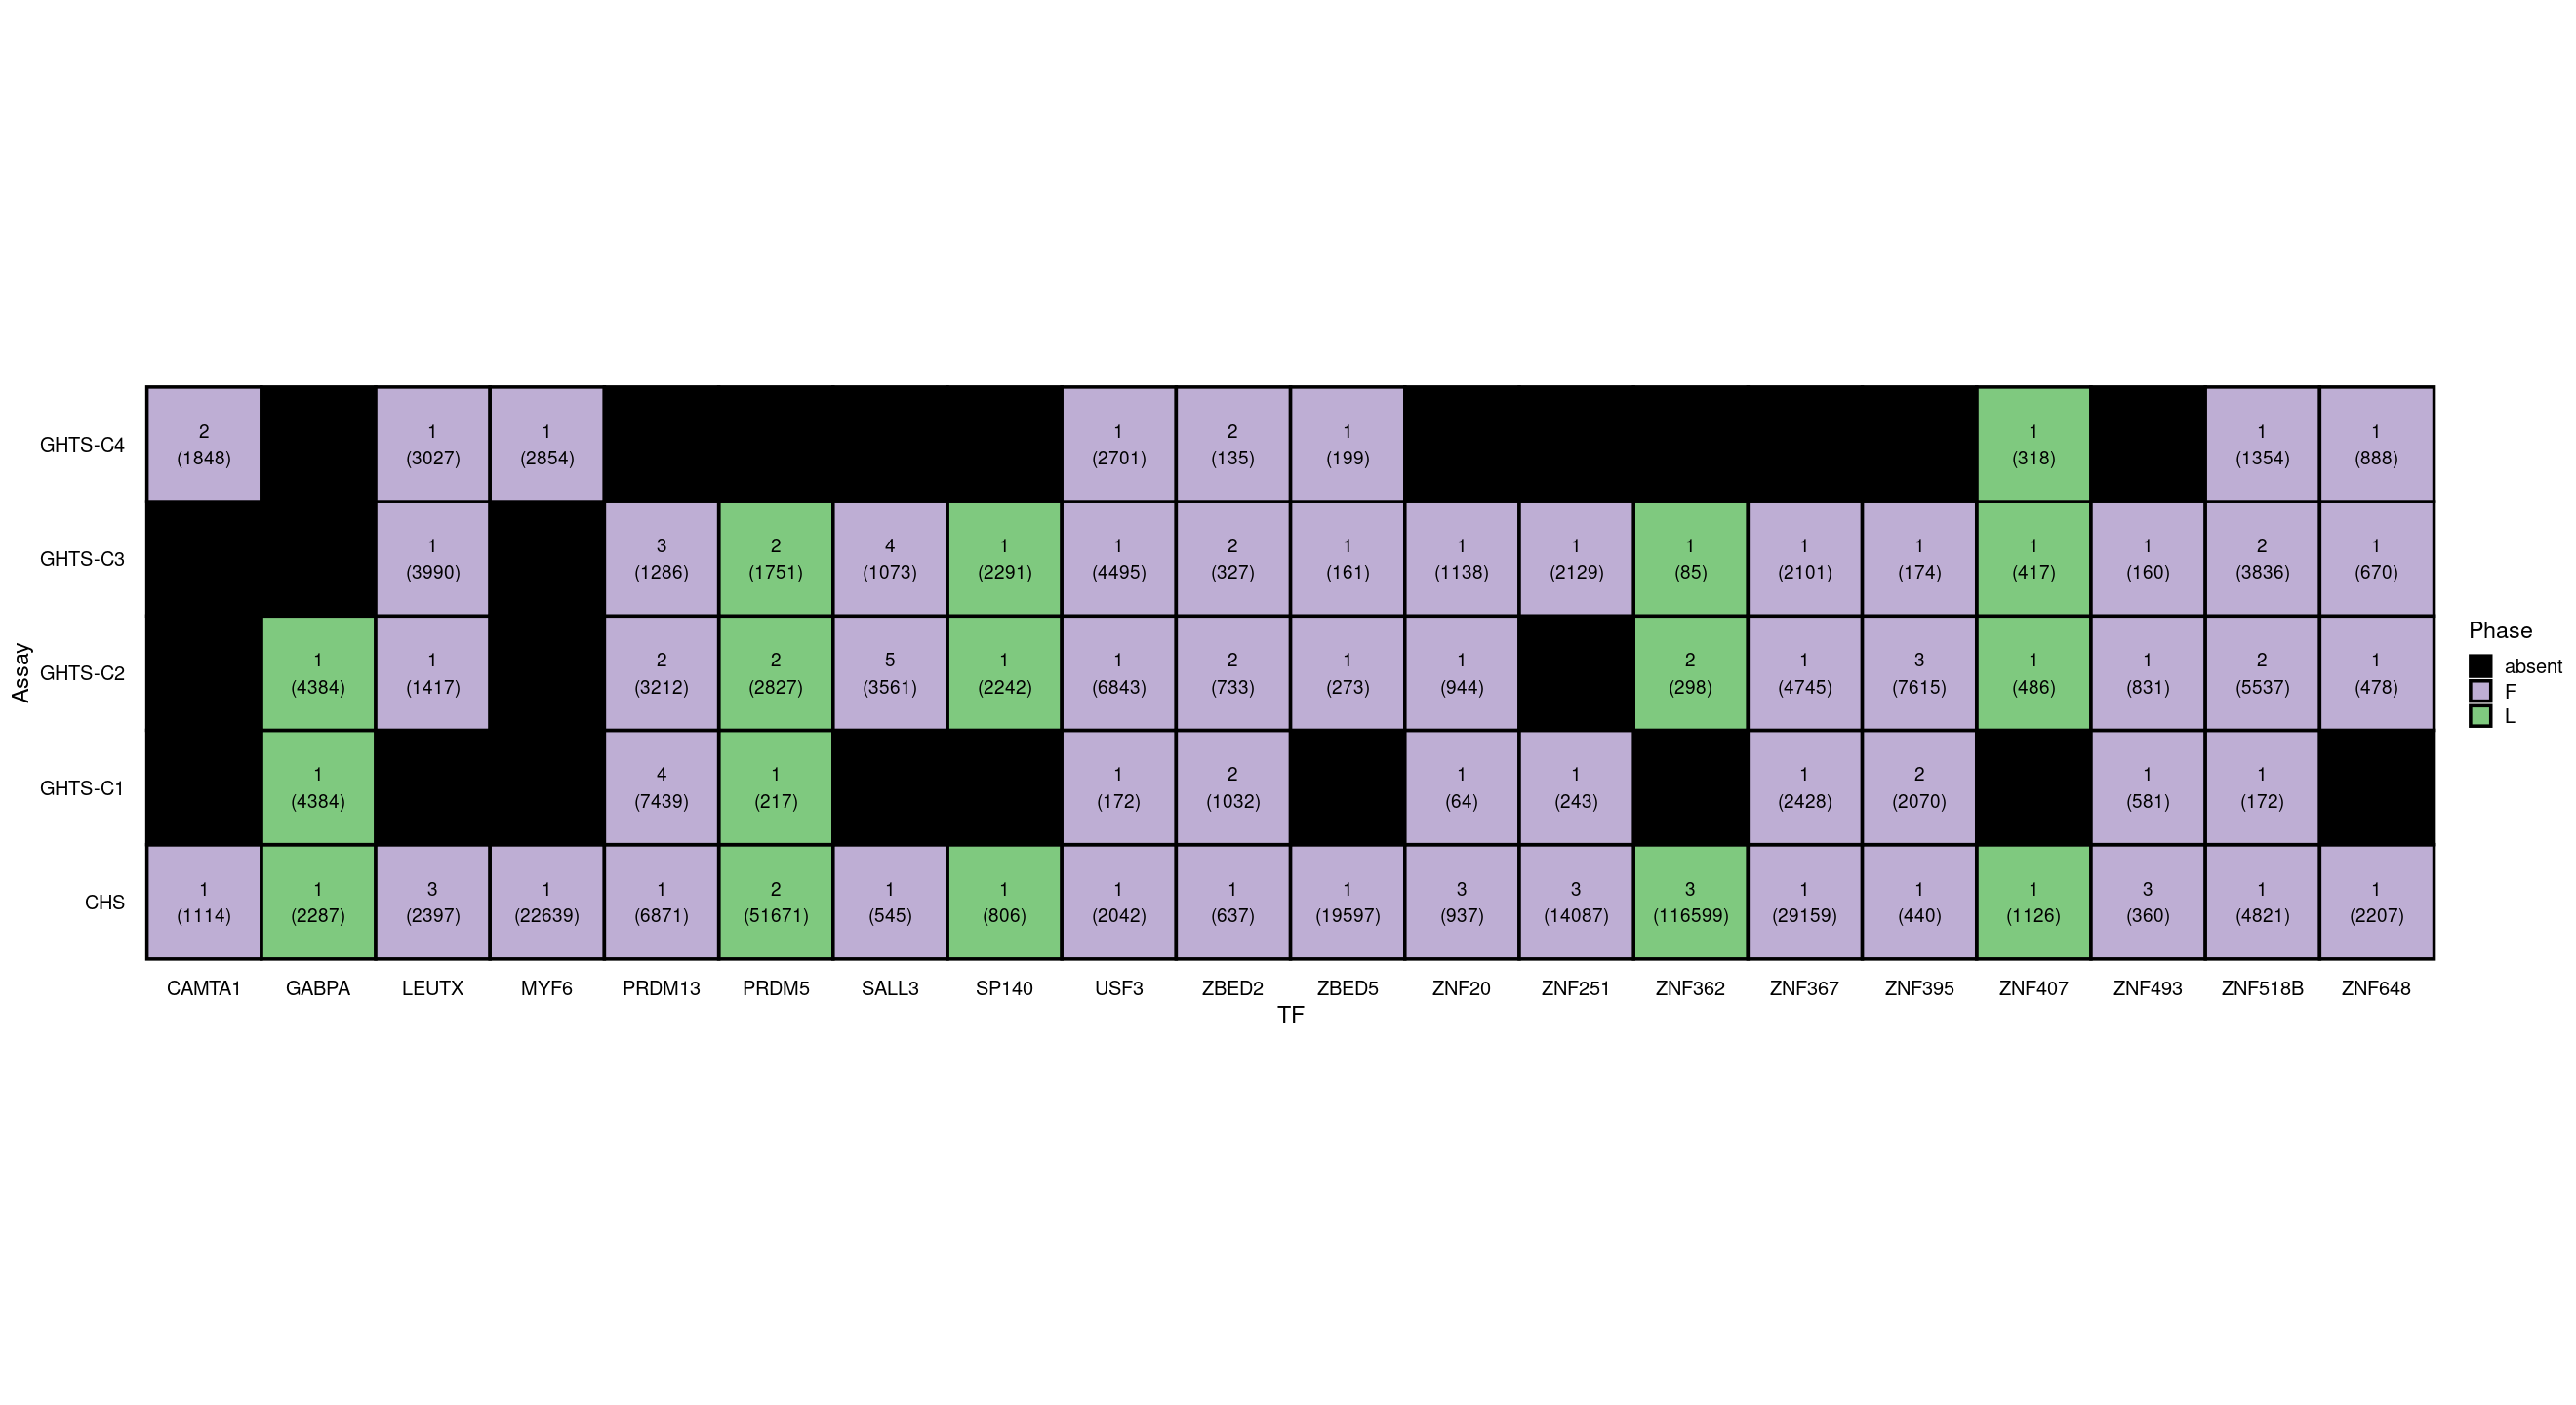

In [5]:
p

In [ ]:
ggsave(filename = "Genomic-Metadata.pdf", plot = p, width = 20, height = 8)

In [8]:
df <- read.table("IBIS-Metadata-Artificial.txt", sep="\t", header = F, stringsAsFactors = F, col.names = c("tf", "assay", "phase", "n"))
df %>% head()

,tf,assay,phase,n
,<chr>,<chr>,<chr>,<int>
1,LEF1,HTS-C1,L,1
2,LEF1,HTS-C2,L,1
3,LEF1,HTS-C3,L,1
4,LEF1,HTS-C4,L,1
5,LEF1,PBM,L,2
6,LEF1,SMS,L,1


In [9]:
df <- df %>% mutate(label = n)

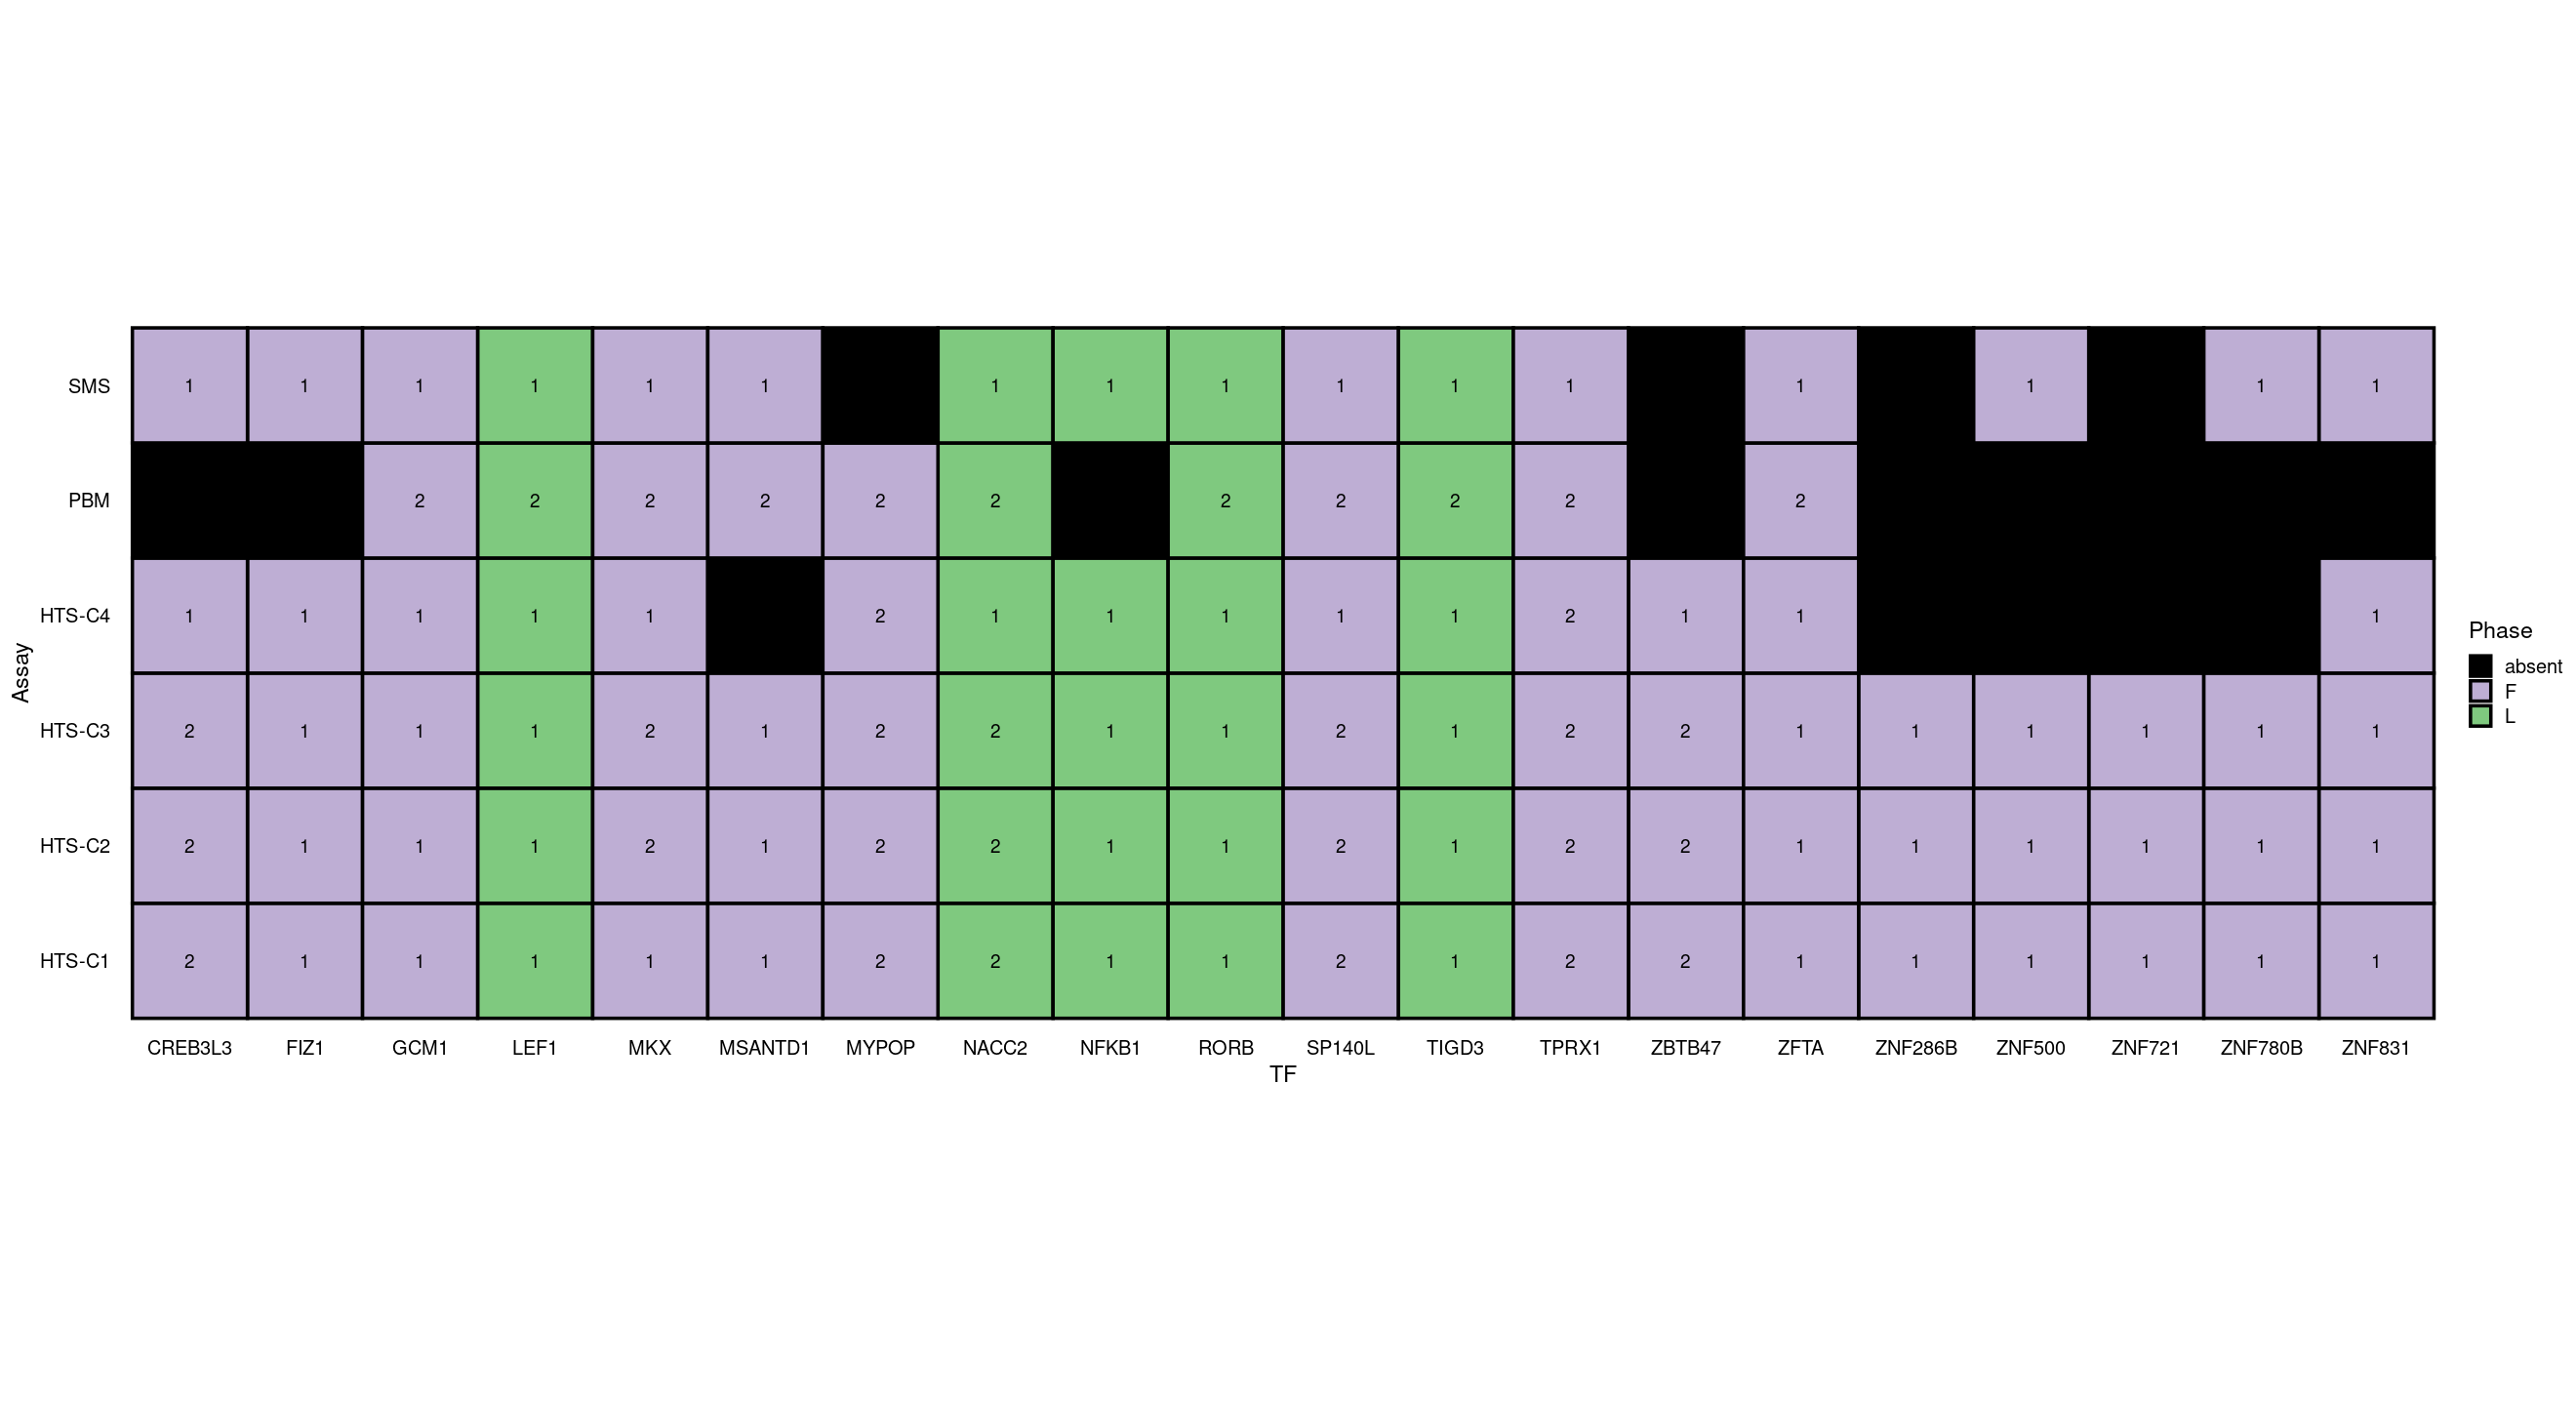

In [10]:
options(repr.plot.width=22, repr.plot.height=12)
ggplot(df, aes(tf, assay, fill=phase, label=label)) + 
    geom_tile(color="black", size=1) +
    geom_text(size=4) + 
    scale_fill_manual("Phase", 
                      values = c("L" = "#7fc97f", "F" = "#beaed4", "absent" = "black")) +  
    scale_y_discrete("Assay") + 
    scale_x_discrete("TF") + 
    coord_fixed() + 
    theme_cowplot() + 
    theme(axis.line = element_blank(), 
          axis.ticks = element_blank())